In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import seaborn as sns
import numpy as np
import geopandas as gpd
from shapely import wkt
from datetime import datetime
import warnings
# Suprimir todas las advertencias
warnings.filterwarnings("ignore")


In [3]:
df =pd.read_csv('homicidios.xlsx - HECHOS.csv')

In [32]:
df.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,1/10/2016,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,1/21/2016,2016,1,21,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    int64  
 15  XY (CA

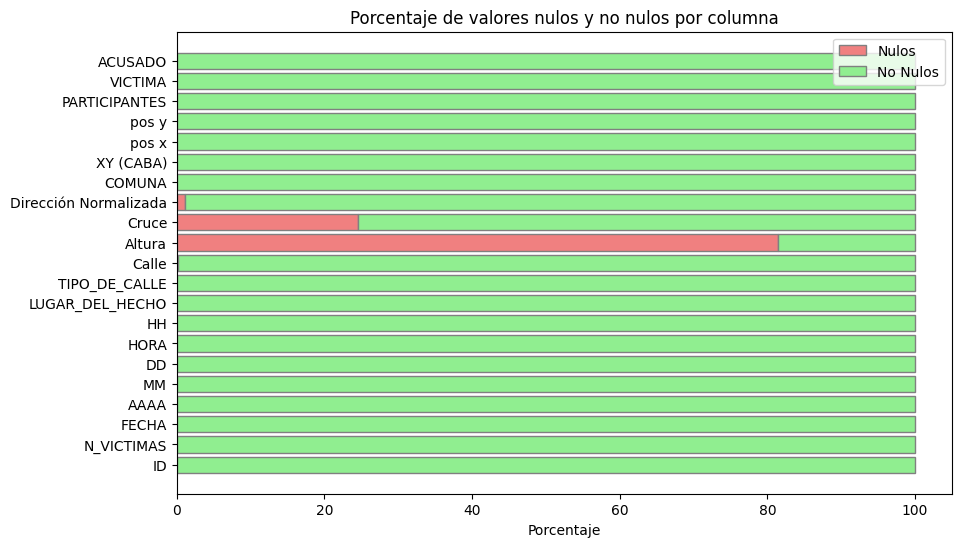

In [4]:

# Contar valores nulos y no nulos por columna
null_counts = df.isnull().sum()
non_null_counts = df.notnull().sum()

# Calcular los porcentajes
total_counts = null_counts + non_null_counts
null_percentage = (null_counts / total_counts) * 100
non_null_percentage = (non_null_counts / total_counts) * 100

# Configurar el tamaño del gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Crear las barras apiladas
bars1 = ax.barh(df.columns, null_percentage, color='lightcoral', edgecolor='grey', label='Nulos')
bars2 = ax.barh(df.columns, non_null_percentage, left=null_percentage, color='lightgreen', edgecolor='grey', label='No Nulos')

# Añadir etiquetas y título
ax.set_xlabel('Porcentaje')
ax.set_title('Porcentaje de valores nulos y no nulos por columna')
ax.legend()

# Mostrar el gráfico
plt.show()

In [33]:
duplicados = df.duplicated().sum()
print("Cantidad de filas duplicadas:", duplicados)

Cantidad de filas duplicadas: 0


Procedo a eleminar la columnas de año mes y dias debedico a que de ser nesesario lo puedo obtener con fecha elimino la altura debedio a que mas 80% son nulos y id por que no me aporta informacion relevante

In [34]:
df = df.drop(['DD','HH','ID'],axis=1)

In [7]:
df.head()

,N_VICTIMAS,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,1,1/1/2016,4:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,1,1/2/2016,1:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,1,1/3/2016,7:00:00,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,1,1/10/2016,0:00:00,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,1,1/21/2016,5:20:00,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


### Reviso la estrutura de Dirección Normalizada

In [8]:
df['Dirección Normalizada'][0]


'PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., GRAL. AV.'

### inputo los valores fatante de las cordenas como la media

In [4]:
# Reemplazar '.' por NaN en las columnas 'x' e 'y'
df['pos x'] = df['pos x'].replace('.', np.nan)
df['pos y'] = df['pos y'].replace('.', np.nan)

In [5]:
df['pos x'] = pd.to_numeric(df['pos x'], errors='coerce')
df['pos y'] = pd.to_numeric(df['pos y'], errors='coerce')

In [6]:
# Reemplazar los NaN con un valor específico, por ejemplo, la media de la columna
df['pos x'] = df['pos x'].fillna(df['pos x'].mean())
df['pos y'] = df['pos y'].fillna(df['pos y'].mean())

## Revisamos la cantidad de siniestro por comuna

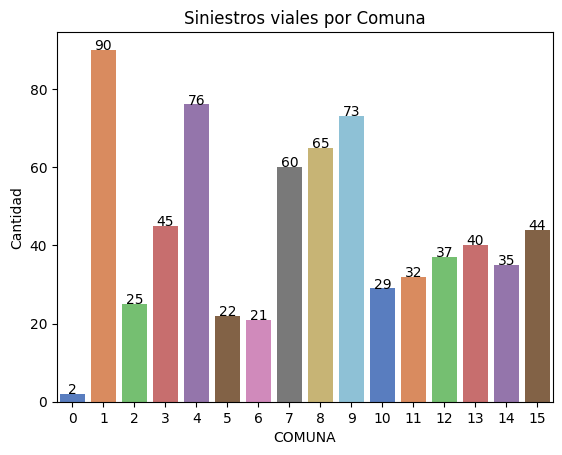

In [14]:
# Suponiendo que df es tu DataFrame original
df2 = df[['COMUNA', 'N_VICTIMAS']].groupby(['COMUNA']).count().reset_index()

plt.figure()
barplot = sns.barplot(data=df2, x='COMUNA', y='N_VICTIMAS', palette='muted')

# Agregar los números en las barras
for index, row in df2.iterrows():
    barplot.text(index, row.N_VICTIMAS, row.N_VICTIMAS, color='black', ha="center")

plt.xlabel('COMUNA')
plt.ylabel('Cantidad')
plt.title('Siniestros Viales por Comuna')
plt.show()

Las comunas con mayor cantidad de siniestros viales son la 1, 4, 9, 8 y 7. A continuación, se detallan las áreas que componen cada una de estas comunas:

- Comuna 1: Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución.
- Comuna 4: La Boca, Barracas, Parque Patricios y Nueva Pompeya.
- Comuna 9: Liniers, Mataderos y Parque Avellaneda.
- Comuna 8: Villa Soldati, Villa Riachuelo y Villa Lugano.
- Comuna 7: Flores y Parque Chacabuco.

En resumen, se observa que la mayoría de los incidentes se concentran en la zona sur de la Ciudad Autónoma de Buenos Aires.

## Revisamos la Cantidad de Victima de por Mes

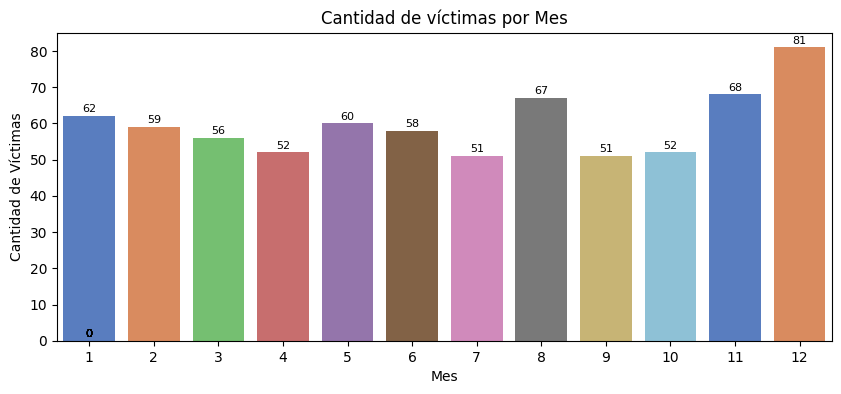

In [13]:
# Agrupación por la cantidad de víctimas por mes
data = df.groupby(['MM'])['N_VICTIMAS'].sum().reset_index()
data["MM"] = data["MM"].astype(int)  # Convertir a tipo entero estándar

# Graficar
plt.figure(figsize=(10, 4))

# Ajuste del código para evitar la advertencia
ax = sns.barplot(x='MM', y='N_VICTIMAS', hue='MM', data=data, palette="muted", dodge=False)
ax.set_title('Cantidad de víctimas por Mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Víctimas')

# Agregar etiquetas de número de víctimas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Eliminar la leyenda que no se necesita
ax.legend_.remove()

# Mostrar la gráfica
plt.show()

Podemos aprecia que el mes de dicembre es el que tiene mas acidentes es el mes de diciembre seguido de noviembre, agosto y enero los meses donde se sulen tener las vaciones 

## Revisamos donde ocurren la mayor parte de acidente

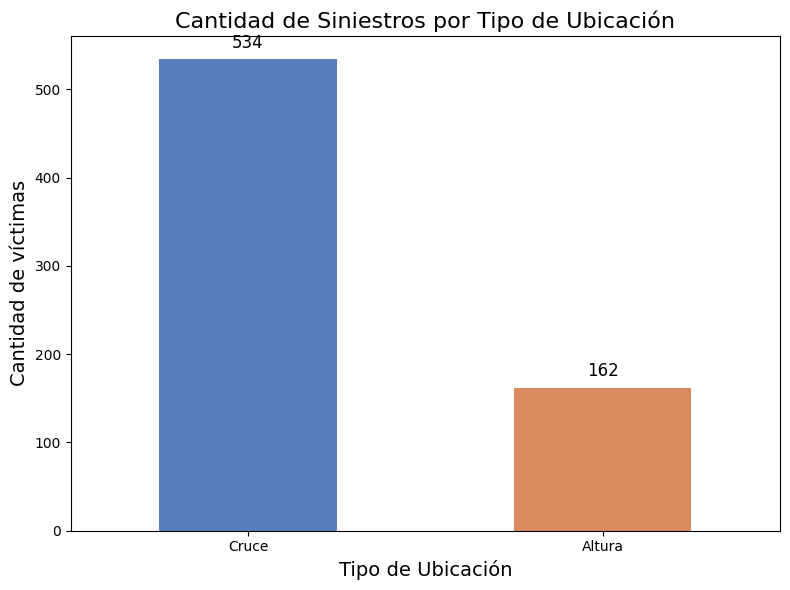

In [15]:
# Asegurarse de que todos los valores en la columna 'Dirección Normalizada' sean cadenas de texto
df['Dirección Normalizada'] = df['Dirección Normalizada'].astype(str)

# Crear una nueva columna que identifique si es cruce o altura
df['Tipo'] = df['Dirección Normalizada'].apply(lambda x: 'Cruce' if ' y ' in x else 'Altura')

# Contar la cantidad de registros de cada tipo
conteo_tipos = df['Tipo'].value_counts()

# Crear la gráfica
plt.figure(figsize=(8, 6))
ax = conteo_tipos.plot(kind='bar', color=['#597DBF', '#D98B5F'])
ax.set_title('Cantidad de Siniestros por Tipo de Ubicación', fontsize=16)
ax.set_xlabel('Tipo de Ubicación', fontsize=14)
ax.set_ylabel('Cantidad de víctimas', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Agregar el número de siniestros encima de las barras
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 12), textcoords="offset points", fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Podemos apreciar que los acidentes suceden en su mayoria en cruces

## hacemos un gif

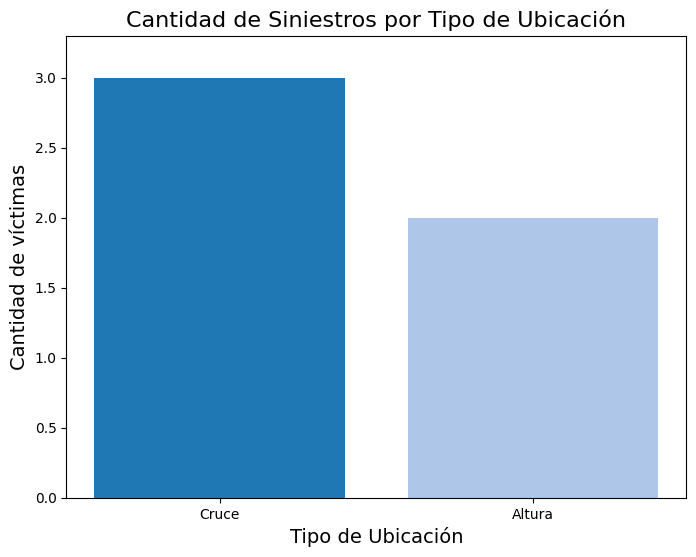

In [29]:
# Asegurarse de que todos los valores en la columna 'Dirección Normalizada' sean cadenas de texto
df['Dirección Normalizada'] = df['Dirección Normalizada'].astype(str)

# Crear una nueva columna que identifique si es cruce o altura
df['Tipo'] = df['Dirección Normalizada'].apply(lambda x: 'Cruce' if ' y ' in x else 'Altura')

# Contar la cantidad de registros de cada tipo
conteo_tipos = df['Tipo'].value_counts()

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 6))
bar_container = ax.bar(conteo_tipos.index, [0]*len(conteo_tipos), color=['#1f77b4', '#D98B5F'])

# Configurar el gráfico
ax.set_title('Cantidad de Siniestros por Tipo de Ubicación', fontsize=16)
ax.set_xlabel('Tipo de Ubicación', fontsize=14)
ax.set_ylabel('Cantidad de víctimas', fontsize=14)
ax.set_ylim(0, conteo_tipos.max() * 1.1)

# Número de cuadros para la animación
frames = 100
pause_frames = 50  # Cuadros adicionales para la pausa

# Función de animación
def animate(frame):
    if frame < frames:
        for bar, height in zip(bar_container, conteo_tipos.values):
            bar.set_height(height * (frame / frames))
    else:
        for bar, height in zip(bar_container, conteo_tipos.values):
            bar.set_height(height)

# Crear la animación
anim = FuncAnimation(fig, animate, frames=frames + pause_frames, interval=50, repeat=False)

# Guardar la animación como GIF
anim.save('conteo_tipos_grow_pause.gif', writer=PillowWriter(fps=20))

plt.show()


In [38]:
# Importar las librerías necesarias
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Cargar datos de límites de barrios
barrios = gpd.read_file('barrios.geojson')

# Supongamos que la columna con los nombres de los barrios se llama 'BARRIO'
nombre_columna_barrio = 'BARRIO'  # Actualiza esto según el nombre real de la columna

# Crear una GeoDataFrame a partir de las coordenadas geográficas
geometry = [Point(xy) for xy in zip(df['pos x'], df['pos y'])]
crs = {'init': 'epsg:4326'}  # Definir el sistema de coordenadas
siniestros_gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

# Asignar cada punto al barrio correspondiente, con manejo de selecciones vacías
def obtener_barrio(punto):
    barrio = barrios[barrios.contains(punto)]
    if not barrio.empty:
        return barrio[nombre_columna_barrio].iloc[0]
    else:
        return 'No Asignado'

siniestros_gdf['Barrio'] = siniestros_gdf['geometry'].apply(obtener_barrio)

# Eliminar la columna geometry, que no se requiere
siniestros_gdf = siniestros_gdf.drop(['geometry'], axis=1)

# Obtener la lista actual de columnas
columnas = list(siniestros_gdf.columns)

# Mover la columna 'BARRIO' para que quede después de 'COMUNA'
columnas.insert(columnas.index('COMUNA') + 1, columnas.pop(columnas.index('Barrio')))

# Reordenar las columnas del DataFrame
siniestros_gdf = siniestros_gdf[columnas]

# Mostrar las primeras filas del DataFrame resultante para verificar
siniestros_gdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   N_VICTIMAS             696 non-null    int64  
 1   FECHA                  696 non-null    object 
 2   AAAA                   696 non-null    int64  
 3   MM                     696 non-null    int64  
 4   HORA                   696 non-null    object 
 5   LUGAR_DEL_HECHO        696 non-null    object 
 6   TIPO_DE_CALLE          696 non-null    object 
 7   Calle                  695 non-null    object 
 8   Altura                 129 non-null    float64
 9   Cruce                  525 non-null    object 
 10  Dirección Normalizada  688 non-null    object 
 11  COMUNA                 696 non-null    int64  
 12  Barrio                 696 non-null    object 
 13  XY (CABA)              696 non-null    object 
 14  pos x                  696 non-null    float64
 15  pos y 

## Revisamos cual es el tipo de calle con mas acidentes

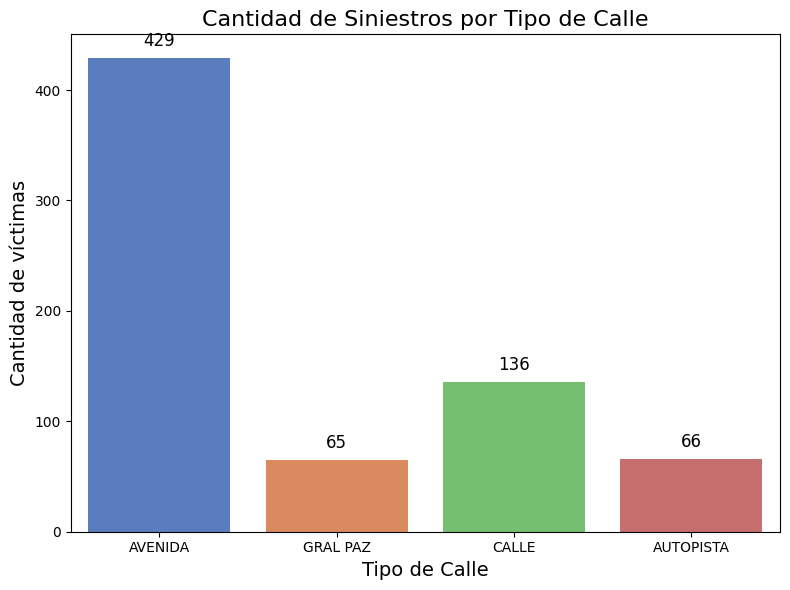

In [16]:

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='TIPO_DE_CALLE', data=df, palette='muted')
ax.set_title('Cantidad de Siniestros por Tipo de Calle', fontsize=16)
ax.set_xlabel('Tipo de Calle', fontsize=14)
ax.set_ylabel('Cantidad de víctimas', fontsize=14)

# Agregar el número de siniestros encima de las barras
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 12), textcoords="offset points", fontsize=12, color='black')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Vemos que el tipo de calle en donde se concentran loss acidentes son las avenidas 

## Revisamos las victimas y acusados

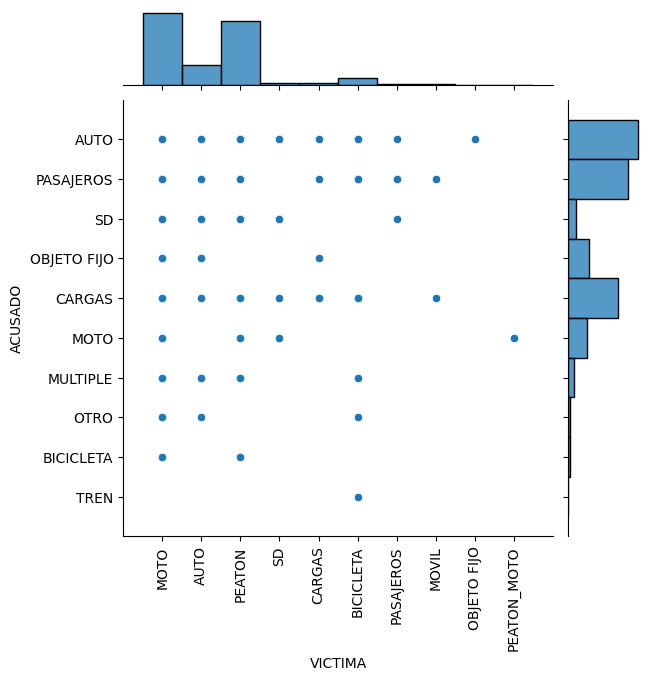

In [14]:

# Crear un jointplot
dis = sns.jointplot(x='VICTIMA', y='ACUSADO', data=df)

# Rotar las etiquetas del eje x
plt.setp(dis.ax_joint.get_xticklabels(), rotation=90)

# Mostrar el gráfico
plt.show()

Podemos apreciar que la victima mas comun suele ser las motos y peatones el acusado mas comun sulen ser autos y vehiculos con pasajeros 

In [5]:
# Suponiendo que 'df' es tu DataFrame
# Esto mostrará el recuento de valores nulos en cada columna
print(df.isnull().sum())

# Esto mostrará las filas donde haya valores nulos en cualquier columna
print(df[df.isnull().any(axis=1)])


N_VICTIMAS                 0
FECHA                      0
HORA                       0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64
     N_VICTIMAS       FECHA      HORA  \
2             1    1/3/2016   7:00:00   
9             1   2/10/2016  11:30:00   
14            1   2/17/2016  16:00:00   
33            1   4/15/2016   5:30:00   
35            1   4/17/2016   0:00:00   
..          ...         ...       ...   
680           1   11/6/2021   4:39:00   
685           1  11/27/2021  11:22:00   
687           1   12/2/2021   1:10:00   
694           1  12/15/2021  10:30:00   
695           1  11/18/2021   6:10:00   

                                       LUGAR_DEL_HECHO TIPO

In [40]:
# Convertir el dataframe a un archivo CSV
siniestros_gdf.to_csv('hechos_limpios2.csv', index=False)

In [44]:
print(df.columns)

Index(['comuna', 'accidentes'], dtype='object')


## Mapa con filtro de año y saturacion por comuna con mas acidentes


Columnas en comunas_df: Index(['WKT', 'ID', 'OBJETO', 'COMUNAS', 'BARRIOS', 'PERIMETRO', 'AREA'], dtype='object')
Columnas en accidentes_df: Index(['N_VICTIMAS', 'FECHA', 'HORA', 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE',
       'Calle', 'Cruce', 'Dirección Normalizada', 'COMUNA', 'XY (CABA)',
       'pos x', 'pos y', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO',
       'N_ACCIDENTES'],
      dtype='object')


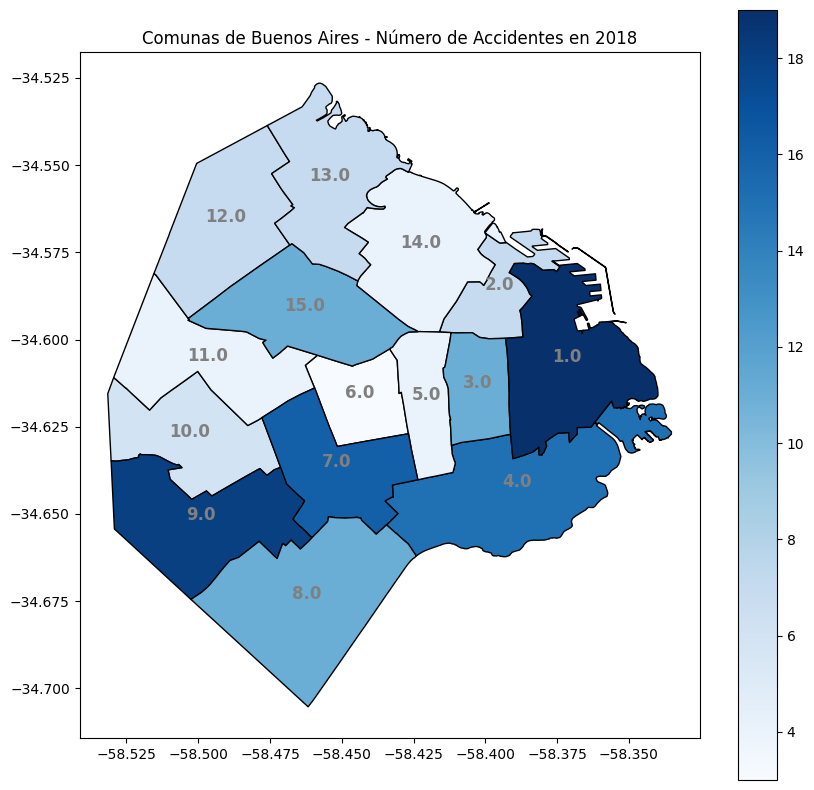

In [27]:

# Leer el archivo CSV de comunas con delimitador ';'
file_path_comunas = 'comunas.csv'
comunas_df = pd.read_csv(file_path_comunas, delimiter=';')

# Verificar las columnas de comunas_df
print("Columnas en comunas_df:", comunas_df.columns)

# Renombrar la columna 'COMUNAS' a 'COMUNA'
comunas_df.rename(columns={'COMUNAS': 'COMUNA'}, inplace=True)

# Convertir la columna WKT a geometría
comunas_df['geometry'] = comunas_df['WKT'].apply(wkt.loads)

# Crear un GeoDataFrame
comunas_gdf = gpd.GeoDataFrame(comunas_df, geometry='geometry')

# Configurar el sistema de coordenadas (asumiremos WGS 84 - EPSG:4326)
comunas_gdf.set_crs(epsg=4326, inplace=True)

# Leer el archivo CSV de accidentes
file_path_accidentes = 'hechos_limpios.csv'
accidentes_df = pd.read_csv(file_path_accidentes)

# Verificar las columnas de accidentes_df
print("Columnas en accidentes_df:", accidentes_df.columns)

# Asegurarse de que la columna de fecha esté en el formato de fecha correcto
accidentes_df['FECHA'] = pd.to_datetime(accidentes_df['FECHA'])

# Función para filtrar y graficar por año
def graficar_accidentes_por_año(year):
    # Filtrar los accidentes por año
    accidentes_filtrados = accidentes_df[accidentes_df['FECHA'].dt.year == year]

    # Contar el número de accidentes por comuna
    accidentes_por_comuna = accidentes_filtrados['COMUNA'].value_counts().reset_index()
    accidentes_por_comuna.columns = ['COMUNA', 'N_ACCIDENTES']

    # Unir los datos de accidentes con el GeoDataFrame de comunas
    comunas_gdf_merged = comunas_gdf.merge(accidentes_por_comuna, on='COMUNA', how='left')

    # Graficar las comunas con colores más oscuros dependiendo del número de accidentes
    fig, ax = plt.subplots(figsize=(10, 10))
    comunas_gdf_merged.plot(ax=ax, column='N_ACCIDENTES', cmap='Blues', legend=True, edgecolor='black')

    # Añadir el número de comuna en el gráfico
    for idx, row in comunas_gdf_merged.iterrows():
        plt.annotate(text=row['COMUNA'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=12, fontweight='bold', color='grey')

    ax.set_title(f'Comunas de Buenos Aires - Número de Accidentes en {year}')
    plt.show()

# Ejemplo de uso para el año 2023
graficar_accidentes_por_año(2018)


## KPI


In [22]:


# Convertir la columna 'FECHA' a tipo datetime
data['FECHA'] = pd.to_datetime(data['FECHA'], format='%m/%d/%Y')

# Definir la población de CABA para el cálculo de la tasa (aproximadamente 3 millones)
POBLACION_CABA = 3_000_000

# Filtrar los datos para obtener los accidentes fatales
accidentes_fatales = data[data['N_VICTIMAS'] > 0]

# Extraer el año y el mes de las fechas para análisis posterior
accidentes_fatales['AÑO'] = accidentes_fatales['FECHA'].dt.year
accidentes_fatales['MES'] = accidentes_fatales['FECHA'].dt.month

# Separar los datos en dos semestres recientes
fecha_max = accidentes_fatales['FECHA'].max()
seis_meses_atras = fecha_max - pd.DateOffset(months=6)
un_año_atras = fecha_max - pd.DateOffset(years=1)

# Semestre reciente y anterior
semestre_reciente = accidentes_fatales[(accidentes_fatales['FECHA'] > seis_meses_atras) & (accidentes_fatales['FECHA'] <= fecha_max)]
semestre_anterior = accidentes_fatales[(accidentes_fatales['FECHA'] > un_año_atras) & (accidentes_fatales['FECHA'] <= seis_meses_atras)]

# Calcular la tasa de homicidios en siniestros viales para ambos semestres
tasa_reciente = (semestre_reciente['N_VICTIMAS'].sum() / POBLACION_CABA) * 100000
tasa_anterior = (semestre_anterior['N_VICTIMAS'].sum() / POBLACION_CABA) * 100000

# Calcular la reducción necesaria (10%)
reducción_necesaria = tasa_anterior * 0.90

# KPI 2: Accidentes mortales de motociclistas en los últimos dos años
motos_reciente = accidentes_fatales[(accidentes_fatales['AÑO'] == fecha_max.year) & (accidentes_fatales['VICTIMA'] == 'MOTO')]
motos_anterior = accidentes_fatales[(accidentes_fatales['AÑO'] == fecha_max.year - 1) & (accidentes_fatales['VICTIMA'] == 'MOTO')]

cantidad_motos_reciente = motos_reciente.shape[0]
cantidad_motos_anterior = motos_anterior.shape[0]

# Calcular la reducción necesaria (7%)
reducción_motos_necesaria = cantidad_motos_anterior * 0.93

# KPI 3: Proponer y calcular un tercer KPI relevante
# Proponemos la cantidad de accidentes en intersecciones peligrosas (consideramos intersecciones con más de un accidente mortal en el último año)

# Agrupar por intersección y contar los accidentes mortales
intersecciones_peligrosas = accidentes_fatales[accidentes_fatales['AÑO'] == fecha_max.year].groupby('LUGAR_DEL_HECHO').size()
intersecciones_peligrosas = intersecciones_peligrosas[intersecciones_peligrosas > 1]

# Calcular la cantidad de accidentes en estas intersecciones peligrosas
cantidad_intersecciones_peligrosas = intersecciones_peligrosas.sum()

# Mostrar los resultados
tasa_reciente, tasa_anterior, reducción_necesaria, cantidad_motos_reciente, cantidad_motos_anterior, reducción_motos_necesaria, cantidad_intersecciones_peligrosas


(1.4, 1.8333333333333333, 1.65, 46, 27, 25.110000000000003, 0)

In [24]:

# Convertir la columna 'FECHA' a tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%m/%d/%Y')

# Definir la población de CABA para el cálculo de la tasa (aproximadamente 3 millones)
POBLACION_CABA = 3_000_000

# Filtrar los datos para obtener los accidentes fatales
accidentes_fatales = df[df['N_VICTIMAS'] > 0]

# Extraer el año y el mes de las fechas para análisis posterior
accidentes_fatales['AÑO'] = accidentes_fatales['FECHA'].dt.year
accidentes_fatales['MES'] = accidentes_fatales['FECHA'].dt.month

# Separar los datos en dos semestres recientes
fecha_max = accidentes_fatales['FECHA'].max()
seis_meses_atras = fecha_max - pd.DateOffset(months=6)
un_año_atras = fecha_max - pd.DateOffset(years=1)

# Semestre reciente y anterior
semestre_reciente = accidentes_fatales[(accidentes_fatales['FECHA'] > seis_meses_atras) & (accidentes_fatales['FECHA'] <= fecha_max)]
semestre_anterior = accidentes_fatales[(accidentes_fatales['FECHA'] > un_año_atras) & (accidentes_fatales['FECHA'] <= seis_meses_atras)]

# Calcular la tasa de homicidios en siniestros viales para ambos semestres
tasa_reciente = (semestre_reciente['N_VICTIMAS'].sum() / POBLACION_CABA) * 100000
tasa_anterior = (semestre_anterior['N_VICTIMAS'].sum() / POBLACION_CABA) * 100000

# Calcular la reducción necesaria (10%)
reducción_necesaria = tasa_anterior * 0.90

# KPI 2: Accidentes mortales de motociclistas en los últimos dos años
motos_reciente = accidentes_fatales[(accidentes_fatales['AÑO'] == fecha_max.year) & (accidentes_fatales['VICTIMA'] == 'MOTO')]
motos_anterior = accidentes_fatales[(accidentes_fatales['AÑO'] == fecha_max.year - 1) & (accidentes_fatales['VICTIMA'] == 'MOTO')]

cantidad_motos_reciente = motos_reciente.shape[0]
cantidad_motos_anterior = motos_anterior.shape[0]

# Calcular la reducción necesaria (7%)
reducción_motos_necesaria = cantidad_motos_anterior * 0.93

# KPI 3: Proponer y calcular un tercer KPI relevante
# Proponemos la cantidad de accidentes en intersecciones peligrosas (consideramos intersecciones con más de un accidente mortal en el último año)

# Agrupar por intersección y contar los accidentes mortales
intersecciones_peligrosas = accidentes_fatales[accidentes_fatales['AÑO'] == fecha_max.year].groupby('LUGAR_DEL_HECHO').size()
intersecciones_peligrosas = intersecciones_peligrosas[intersecciones_peligrosas > 1]



# Mostrar los resultados
tasa_reciente, tasa_anterior, reducción_necesaria, cantidad_motos_reciente, cantidad_motos_anterior, reducción_motos_necesaria

(1.4, 1.8333333333333333, 1.65, 46, 27, 25.110000000000003)

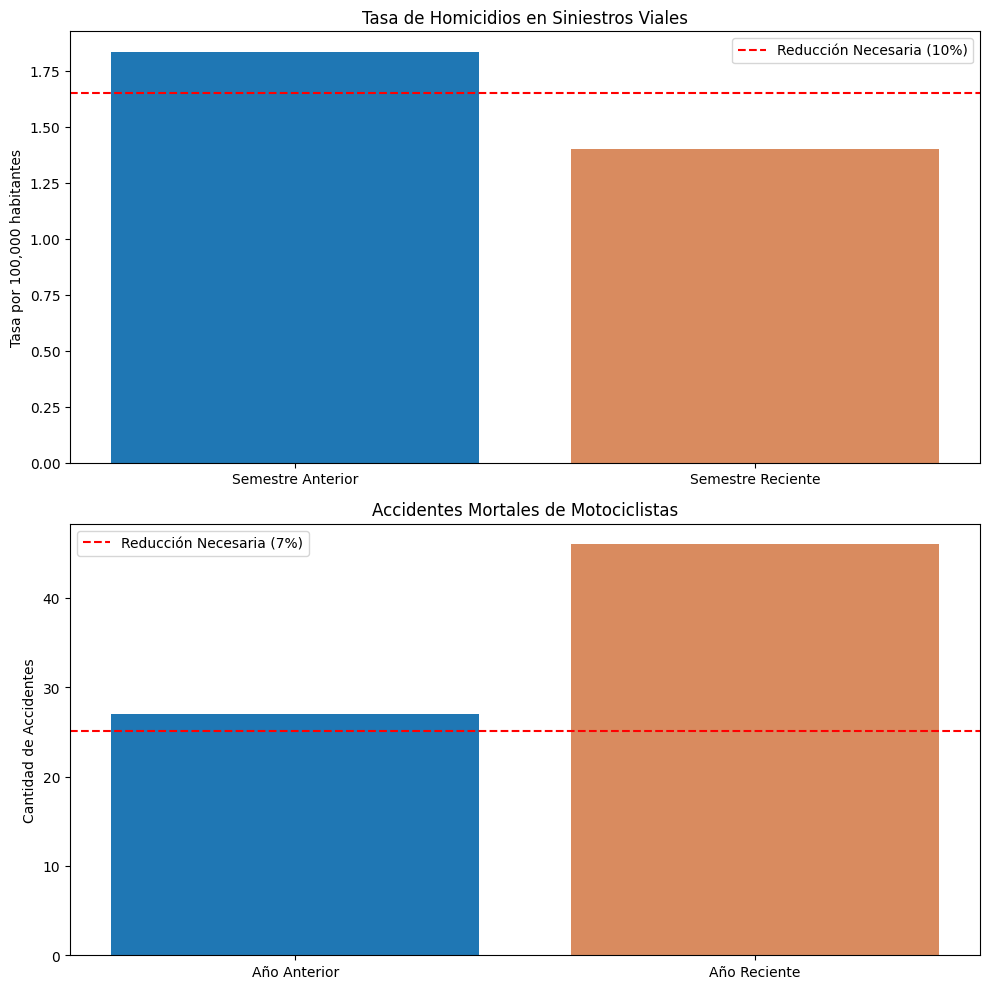

In [29]:

# Crear una figura y ejes para los gráficos
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# KPI 1: Tasa de homicidios en siniestros viales
axs[0].bar(['Semestre Anterior', 'Semestre Reciente'], [tasa_anterior, tasa_reciente], color=['#1f77b4', '#D98B5F'])
axs[0].axhline(y=reducción_necesaria, color='r', linestyle='--', label='Reducción Necesaria (10%)')
axs[0].set_title('Tasa de Homicidios en Siniestros Viales')
axs[0].set_ylabel('Tasa por 100,000 habitantes')
axs[0].legend()

# KPI 2: Accidentes mortales de motociclistas
axs[1].bar(['Año Anterior', 'Año Reciente'], [cantidad_motos_anterior, cantidad_motos_reciente], color=['#1f77b4', '#D98B5F'])
axs[1].axhline(y=reducción_motos_necesaria, color='r', linestyle='--', label='Reducción Necesaria (7%)')
axs[1].set_title('Accidentes Mortales de Motociclistas')
axs[1].set_ylabel('Cantidad de Accidentes')
axs[1].legend()


# Ajustar el layout
plt.tight_layout()
plt.show()


Podemos ver que el kpi de acidentes se cumplio mientra que el de motos no se logro cumplir

## ideas de posibles kpi

Reducción de Accidentes Involucrando Peatones

conparar el ultimo año con el anterior para saber si se cumplio

Meta: Reducir en un 5% la cantidad de accidentes con peatones.

Meta: Reducir en un 5% los accidentes ocurridos durante la noche.


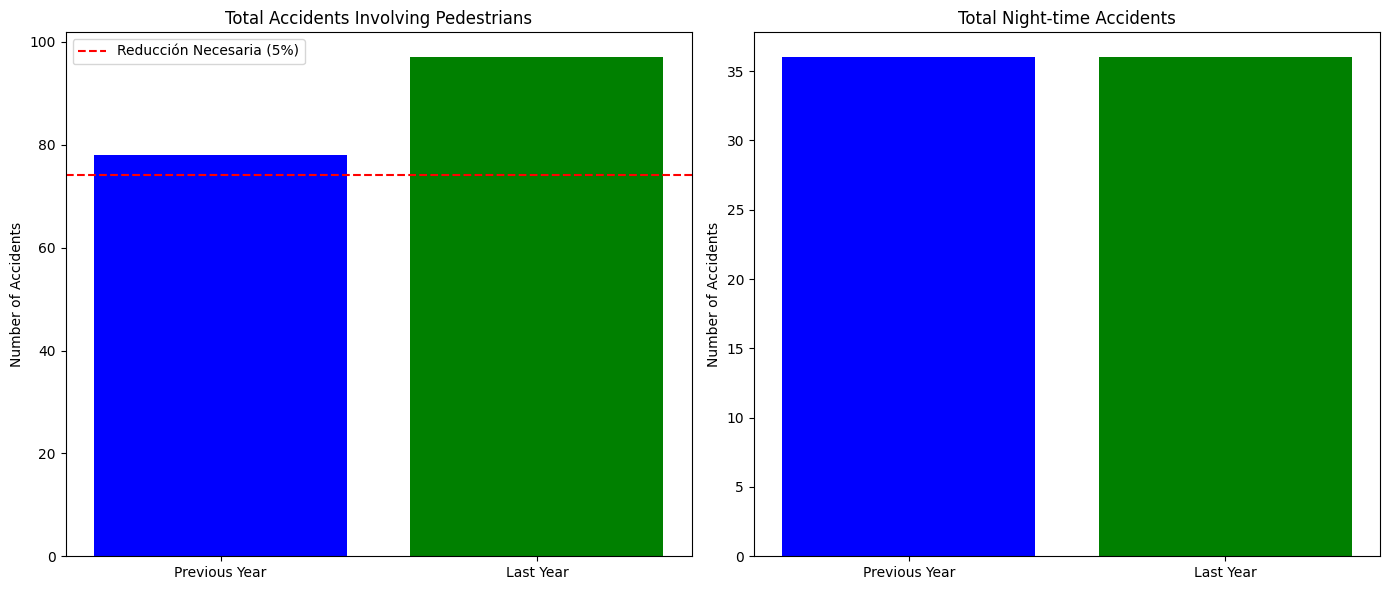

In [40]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = 'hechos_limpios.csv'
data = pd.read_csv(file_path)

# Convertir la columna 'FECHA' al formato datetime
data['FECHA'] = pd.to_datetime(data['FECHA'], format='%m/%d/%Y')

# Extraer el año de la columna 'FECHA'
data['YEAR'] = data['FECHA'].dt.year

# Definir los dos últimos años en el dataset
last_year = data['YEAR'].max()
previous_year = last_year - 1

# Filtrar los datos de los dos últimos años
data_last_year = data[data['YEAR'] == last_year]
data_previous_year = data[data['YEAR'] == previous_year]

# Definir la función para determinar si un accidente es nocturno
def is_night_time(hour_str):
    time_obj = datetime.strptime(hour_str, "%H:%M:%S").time()
    return time_obj >= datetime.strptime("20:00:00", "%H:%M:%S").time() or time_obj <= datetime.strptime("06:00:00", "%H:%M:%S").time()

# Filtrar las filas donde 'HORA' tiene un formato de hora válido
def is_valid_time(hour_str):
    try:
        datetime.strptime(hour_str, "%H:%M:%S")
        return True
    except ValueError:
        return False

data = data[data['HORA'].apply(is_valid_time)]

# Aplicar la función para crear la columna 'NOCTURNO'
data['NOCTURNO'] = data['HORA'].apply(is_night_time)

# Recalcular los datos filtrados para los dos últimos años
data_last_year = data[data['YEAR'] == last_year]
data_previous_year = data[data['YEAR'] == previous_year]

# Contar el número de accidentes para cada año
total_accidents_last_year = data_last_year.shape[0]
total_accidents_previous_year = data_previous_year.shape[0]
reducción_accidents_necesaria=total_accidents_previous_year-(total_accidents_previous_year*0.05)

# Contar el número de accidentes nocturnos para cada año
night_accidents_last_year = data_last_year[data_last_year['NOCTURNO'] == True].shape[0]
night_accidents_previous_year = data_previous_year[data_previous_year['NOCTURNO'] == True].shape[0]

# Graficar los resultados
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Graficar accidentes totales
ax[0].bar(['Previous Year', 'Last Year'], [total_accidents_previous_year, total_accidents_last_year], color=['blue', 'green'])
ax[0].axhline(y=reducción_accidents_necesaria, color='r', linestyle='--', label='Reducción Necesaria (5%)')
ax[0].set_title('Total Accidents Involving Pedestrians')
ax[0].set_ylabel('Number of Accidents')
ax[0].legend()

# Graficar accidentes nocturnos
ax[1].bar(['Previous Year', 'Last Year'], [night_accidents_previous_year, night_accidents_last_year], color=['blue', 'green'])
ax[1].set_title('Total Night-time Accidents')
ax[1].set_ylabel('Number of Accidents')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

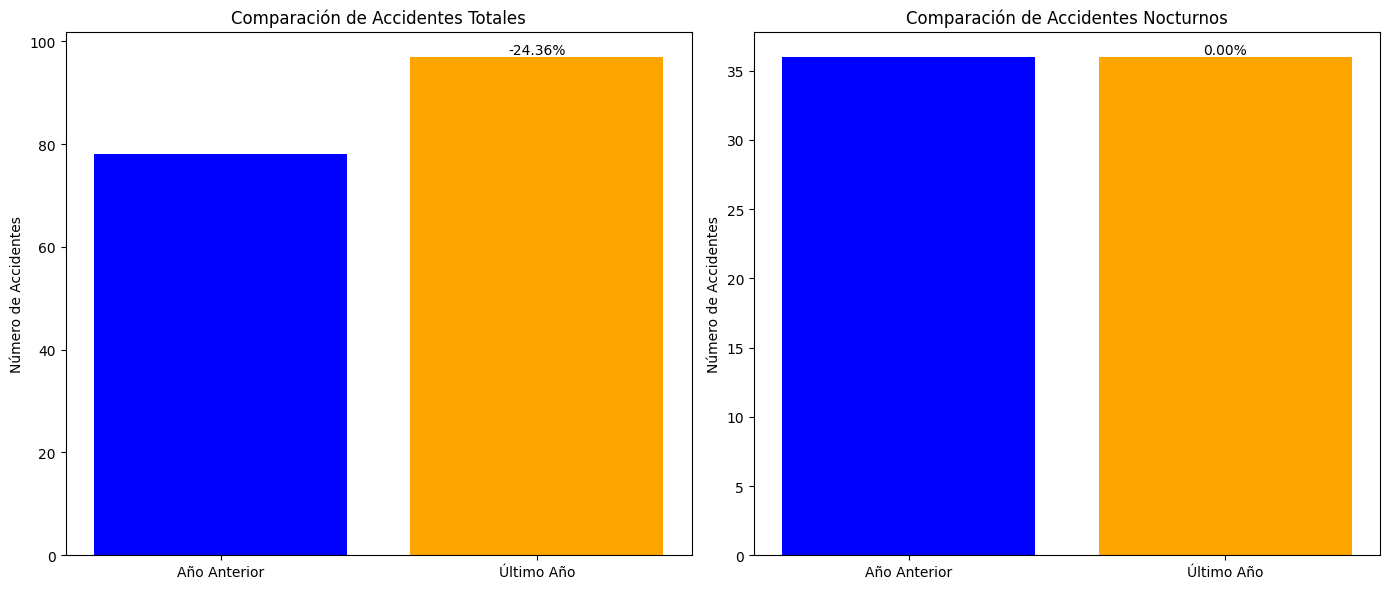

(97, 78, -24.358974358974358, False, 36, 36, 0.0, False)

In [35]:
import matplotlib.pyplot as plt

# Calculate the total number of accidents for each year
total_accidents_last_year = data_last_year['N_ACCIDENTES'].count()
total_accidents_previous_year = data_previous_year['N_ACCIDENTES'].count()

# Calculate the number of nocturnal accidents for each year
night_accidents_last_year = data_last_year[data_last_year['NOCTURNO'] == True]['N_ACCIDENTES'].count()
night_accidents_previous_year = data_previous_year[data_previous_year['NOCTURNO'] == True]['N_ACCIDENTES'].count()

# Calculate the reduction percentages
total_accidents_reduction_percentage = ((total_accidents_previous_year - total_accidents_last_year) / total_accidents_previous_year) * 100
night_accidents_reduction_percentage = ((night_accidents_previous_year - night_accidents_last_year) / night_accidents_previous_year) * 100

# Check if the goals were met
total_accidents_goal_met = total_accidents_reduction_percentage >= 5
night_accidents_goal_met = night_accidents_reduction_percentage >= 5

# Plotting the results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for total accidents
axs[0].bar(['Año Anterior', 'Último Año'], [total_accidents_previous_year, total_accidents_last_year], color=['blue', 'orange'])
axs[0].set_title('Comparación de Accidentes Totales')
axs[0].set_ylabel('Número de Accidentes')
axs[0].text(1, total_accidents_last_year, f'{total_accidents_reduction_percentage:.2f}%', ha='center', va='bottom')

# Plot for nocturnal accidents
axs[1].bar(['Año Anterior', 'Último Año'], [night_accidents_previous_year, night_accidents_last_year], color=['blue', 'orange'])
axs[1].set_title('Comparación de Accidentes Nocturnos')
axs[1].set_ylabel('Número de Accidentes')
axs[1].text(1, night_accidents_last_year, f'{night_accidents_reduction_percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Outputting results
(total_accidents_last_year, total_accidents_previous_year, total_accidents_reduction_percentage, total_accidents_goal_met, night_accidents_last_year, night_accidents_previous_year, night_accidents_reduction_percentage, night_accidents_goal_met)


In [46]:
# Suponiendo que tienes un DataFrame llamado df con tus datos
# Reemplaza "df" con el nombre real de tu DataFrame

# Convertir la columna FECHA a tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Limpiar la columna HORA para asegurarnos de que todos los valores sean cadenas de fecha y hora válidas
def clean_time(time_str):
    try:
        pd.to_datetime(time_str)
        return True
    except ValueError:
        return False

df = df[df['HORA'].apply(clean_time)]

# Extraer el año de la columna FECHA y crear una nueva columna 'AÑO'
df['AÑO'] = df['FECHA'].dt.year

# Contar los accidentes con peatones por año
accidentes_peatones = df[df['VICTIMA'] == 'PEATON'].groupby('AÑO').size()

# Contar los accidentes ocurridos durante la noche por año
accidentes_noche = df[df['HORA'].apply(lambda x: pd.to_datetime(x).hour >= 20 or pd.to_datetime(x).hour <= 6)].groupby('AÑO').size()

# Calcular la reducción porcentual de accidentes con peatones
reduccion_peatones = ((accidentes_peatones.shift(1) - accidentes_peatones) / accidentes_peatones.shift(1)) * 100

# Calcular la reducción porcentual de accidentes ocurridos durante la noche
reduccion_noche = ((accidentes_noche.shift(1) - accidentes_noche) / accidentes_noche.shift(1)) * 100

# Meta: Reducir en un 5% la cantidad de accidentes con peatones
meta_reduccion_peatones = -5

# Meta: Reducir en un 5% los accidentes ocurridos durante la noche
meta_reduccion_noche = -5

# Verificar si se cumplieron las metas
meta_cumplida_peatones = reduccion_peatones.iloc[-1] <= meta_reduccion_peatones
meta_cumplida_noche = reduccion_noche.iloc[-1] <= meta_reduccion_noche

# Imprimir los resultados
print("Reducción de accidentes con peatones:")
print(reduccion_peatones)
print("¿Se cumplió la meta de reducción de accidentes con peatones?:", meta_cumplida_peatones)
print("\nReducción de accidentes ocurridos durante la noche:")
print(reduccion_noche)
print("¿Se cumplió la meta de reducción de accidentes ocurridos durante la noche?:", meta_cumplida_noche)


Reducción de accidentes con peatones:
AÑO
2016          NaN
2017     0.000000
2018   -32.653061
2019    47.692308
2020     0.000000
2021     2.941176
dtype: float64
¿Se cumplió la meta de reducción de accidentes con peatones?: False

Reducción de accidentes ocurridos durante la noche:
AÑO
2016          NaN
2017    26.760563
2018   -13.461538
2019    40.677966
2020   -20.000000
2021     0.000000
dtype: float64
¿Se cumplió la meta de reducción de accidentes ocurridos durante la noche?: False


## Cargamos el exel de lesiones


Debido a este exel tiene varias hojas que nos interesan nesitamos cargalosss por separado

In [32]:
hojas =pd.read_excel('lesiones.xlsx', sheet_name=None)

In [33]:
lesiones=hojas['HECHOS']

In [34]:
lesiones2 = hojas['VICTIMAS']

In [70]:
lesiones2.head()

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD


In [69]:
lesiones.head()

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD


luego los unimos en un solo df

In [35]:
# Realizamos la unión basada en la columna 'id' de lesiones
lesiones = pd.merge(lesiones, lesiones2[['ID hecho', 'VEHICULO_VICTIMA', 'SEXO', 'EDAD_VICTIMA']], left_on='id', right_on='ID hecho', how='left')

# Rellenamos los valores faltantes con 'SD' en las columnas 'VEHICULO_VICTIMA', 'SEXO' y 'EDAD_VICTIMA'
columnas_a_rellenar = ['VEHICULO_VICTIMA', 'SEXO', 'EDAD_VICTIMA']
for columna in columnas_a_rellenar:
    lesiones[columna] = lesiones[columna].fillna('SD')

In [74]:
lesiones.tail()

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,moto,auto,transporte_publico,camion,ciclista,gravedad,ID hecho,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA
27597,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19:40:00,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,...,SD,SD,SD,SD,SD,SD,LC-2021-0652865,SD,Varon,28
27598,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19:40:00,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,...,SD,SD,SD,SD,SD,SD,LC-2021-0652865,SD,Varon,52
27599,LC-2021-0652907,1,2021,12,31,2021-12-31 00:00:00,20:00:00,20,SD,1,...,SD,SD,SD,SD,SD,SD,LC-2021-0652907,SD,Varon,23
27600,LC-2021-0652921,1,2021,12,31,2021-12-31 00:00:00,22:00:00,22,LINIERS VIRREY y MORENO,5,...,x,0,x,0,0,GRAVE,LC-2021-0652921,MOTO,Varon,31
27601,LC-2020-0244615,1,2020,5,17,5/17/2020,21:00:00,21,SD,SD,...,x,x,0,0,0,SD,LC-2020-0244615,MOTO,Varon,46


# revisamos valores nulos 

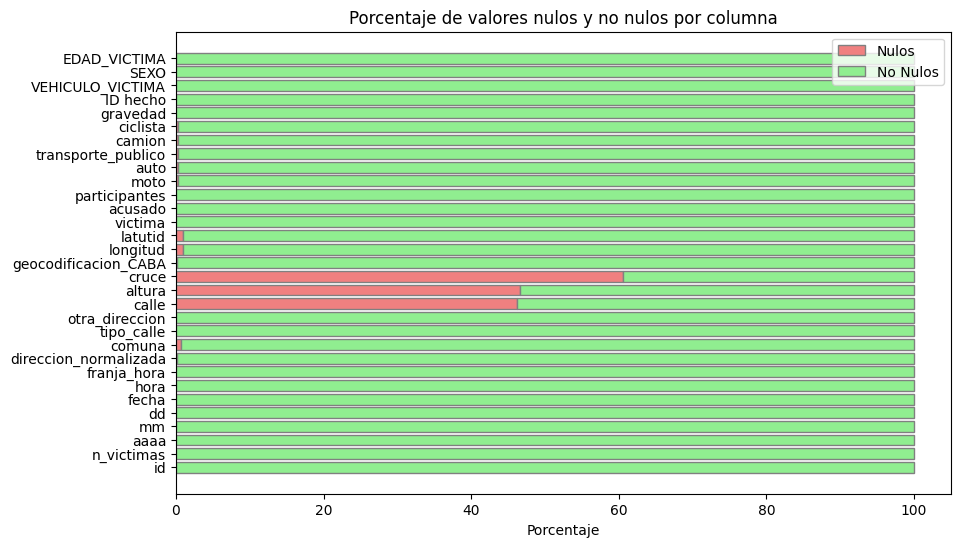

In [75]:

# Contar valores nulos y no nulos por columna
null_counts = lesiones.isnull().sum()
non_null_counts = lesiones.notnull().sum()

# Calcular los porcentajes
total_counts = null_counts + non_null_counts
null_percentage = (null_counts / total_counts) * 100
non_null_percentage = (non_null_counts / total_counts) * 100

# Configurar el tamaño del gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Crear las barras apiladas
bars1 = ax.barh(lesiones.columns, null_percentage, color='lightcoral', edgecolor='grey', label='Nulos')
bars2 = ax.barh(lesiones.columns, non_null_percentage, left=null_percentage, color='lightgreen', edgecolor='grey', label='No Nulos')

# Añadir etiquetas y título
ax.set_xlabel('Porcentaje')
ax.set_title('Porcentaje de valores nulos y no nulos por columna')
ax.legend()

# Mostrar el gráfico
plt.show()

## Revisamos valores unicos 

In [76]:
# Obtener los valores únicos de todas las columnas
valores_unicos = {col: lesiones[col].unique() for col in lesiones.columns}

# Imprimir los valores únicos
for col, valores in valores_unicos.items():
    print(f"Valores únicos en '{col}': {valores}")

Valores únicos en 'id': ['LC-2019-0000179' 'LC-2019-0000053' 'LC-2019-0000063' ...
 'LC-2021-0652907' 'LC-2021-0652921' 'LC-2020-0244615']
Valores únicos en 'n_victimas': [ 1  4  2  3  5 10  6 16  8  0  7]
Valores únicos en 'aaaa': [2019 2020 2021]
Valores únicos en 'mm': [ 1  2  3  4  5  6  7  8  9 10 11 12]
Valores únicos en 'dd': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Valores únicos en 'fecha': [datetime.datetime(2019, 1, 1, 0, 0) datetime.datetime(2019, 1, 2, 0, 0)
 datetime.datetime(2019, 1, 3, 0, 0) ...
 datetime.datetime(2021, 12, 30, 0, 0)
 datetime.datetime(2021, 12, 31, 0, 0) '5/17/2020']
Valores únicos en 'hora': [datetime.time(9, 0) datetime.time(1, 55) datetime.time(2, 0) ...
 datetime.time(22, 46) datetime.time(0, 57) datetime.time(6, 38)]
Valores únicos en 'franja_hora': [9 1 2 4 8 7 12 13 19 18 21 3 15 14 5 17 23 10 16 11 20 22 0 6 'sd' nan]
Valores únicos en 'direccion_normalizada': ['SD' 'PAZ, GRAL. AV. y ACHA, 

## remplazo los valores

In [36]:
# Definir un diccionario de mapeo de valores a reemplazar y su valor de reemplazo
mapeo_reemplazo = {'No Especificada': 'SD'}
mapeo_reemplazo2 = {'sd': 'SD'}

# Reemplazar los valores en la columna 'price' según el diccionario de mapeo franja_hora
lesiones['comuna'] = lesiones['comuna'].replace(mapeo_reemplazo)
lesiones['franja_hora'] = lesiones['franja_hora'].replace(mapeo_reemplazo2)


In [37]:
lesiones['gravedad'] = lesiones['gravedad'].str.upper()
lesiones['SEXO'] = lesiones['SEXO'].str.upper()
lesiones['VEHICULO_VICTIMA'] = lesiones['VEHICULO_VICTIMA'].str.upper()

In [38]:
valores_unicos_columna = lesiones['gravedad'].unique()

print("Valores únicos en 'gravedad':", valores_unicos_columna)
print("Valores únicos en 'SEXO':", lesiones['SEXO'].unique())
print("Valores únicos en 'VEHICULO_VICTIMA':", lesiones['VEHICULO_VICTIMA'].unique())

Valores únicos en 'gravedad': ['SD' 'GRAVE' 'FATAL']
Valores únicos en 'SEXO': ['SD' 'VARON' 'MUJER' 'MUJER ']
Valores únicos en 'VEHICULO_VICTIMA': ['SD' 'CICLISTA' 'MOTO' 'PEATON' 'AUTO' 'TRANSPORTE PUBLICO' 'UTILITARIO'
 'TAXI' 'MIXTO' 'CAMION' 'MONOPATIN' 'MOVIL' 'OTRO']


## verifico filas duplicadas 

In [39]:
# Contar filas duplicadas
filas_duplicadas = lesiones.duplicated().sum()
print(f"Filas duplicadas: {filas_duplicadas}")

Filas duplicadas: 631


In [40]:
# Borrar filas duplicadas
lesiones = lesiones.drop_duplicates()


In [83]:
# Contar filas duplicadas
filas_duplicadas = lesiones.duplicated().sum()
print(f"Filas duplicadas: {filas_duplicadas}")

Filas duplicadas: 0


In [41]:
# Eliminar la columnas
lesiones = lesiones.drop(columns=['id','direccion_normalizada','ciclista','camion','transporte_publico','calle','cruce','altura','moto','auto','ID hecho'])

lesiones.head()

,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,comuna,tipo_calle,otra_direccion,geocodificacion_CABA,longitud,latutid,victima,acusado,participantes,gravedad,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA
0,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,14,SD,"Obligado Rafael, Av.Costanera 3300, Barrio: Pa...",Point (104991.46333918849995825 107720.9664748...,-58.408911,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD
1,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,8,SD,"Autopista Presidente Héctor J. Cámpora y Roca,...",Point (101813.84712503915943671 95578.55507230...,-58.44351,-34.669125,AUTO,SD,AUTO-SD,SD,SD,VARON,57
2,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,8,SD,"Barros Pazos, Jose y Larraya 0, Barrio: Villa ...",Point (99538.58660300650808495 94643.418717990...,-58.468335,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD
3,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,7,SD,"Torres Y Tenorio, Pres. y Riestra Av. 0, Barri...",Point (102372.16830963784013875 97994.13750300...,-58.437425,-34.647349,PEATON,SD,PEATON-SD,SD,SD,VARON,SD
4,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,3,SD,"Corrientes Av. y Uriburu Jose E., Pres. 0, Bar...",Point (105968.98286849579017144 102737.1734686...,-58.398225,-34.604579,AUTO,SD,AUTO-SD,SD,SD,VARON,45


In [85]:

# Ver el tipo de dato de cada columna
tipos_de_datos = lesiones.dtypes

# Mostrar los tipos de datos
print(tipos_de_datos)

n_victimas               int64
aaaa                     int64
mm                       int64
dd                       int64
fecha                   object
hora                    object
franja_hora             object
comuna                  object
tipo_calle              object
otra_direccion          object
geocodificacion_CABA    object
longitud                object
latutid                 object
victima                 object
acusado                 object
participantes           object
gravedad                object
VEHICULO_VICTIMA        object
SEXO                    object
EDAD_VICTIMA            object
dtype: object


In [42]:
# Convertir la columna 'fecha' a tipo datetime
lesiones['fecha'] = pd.to_datetime(lesiones['fecha'])

# Eliminar la hora, quedándose solo con la fecha
lesiones['fecha'] = lesiones['fecha'].dt.date

In [87]:
lesiones['fecha']

0        2019-01-01
1        2019-01-01
2        2019-01-01
3        2019-01-01
4        2019-01-01
            ...    
27597    2021-12-31
27598    2021-12-31
27599    2021-12-31
27600    2021-12-31
27601    2020-05-17
Name: fecha, Length: 26971, dtype: object

In [43]:

# Reemplazar los valores 'SD' y 'sd' por NaN para que no interfieran con el cálculo de la media
lesiones['EDAD_VICTIMA'] = lesiones['EDAD_VICTIMA'].replace(['SD', 'sd'], np.nan)

# Calcular la media de las edades válidas
media_edades = lesiones['EDAD_VICTIMA'].astype(float).mean()

# Rellenar los valores NaN con la media de las edades
lesiones['EDAD_VICTIMA'] = lesiones['EDAD_VICTIMA'].fillna(media_edades)

# Opcionalmente, puedes convertir las edades de nuevo a enteros
lesiones['EDAD_VICTIMA'] = lesiones['EDAD_VICTIMA'].astype(int)


### Distribución de las edades de las víctimas


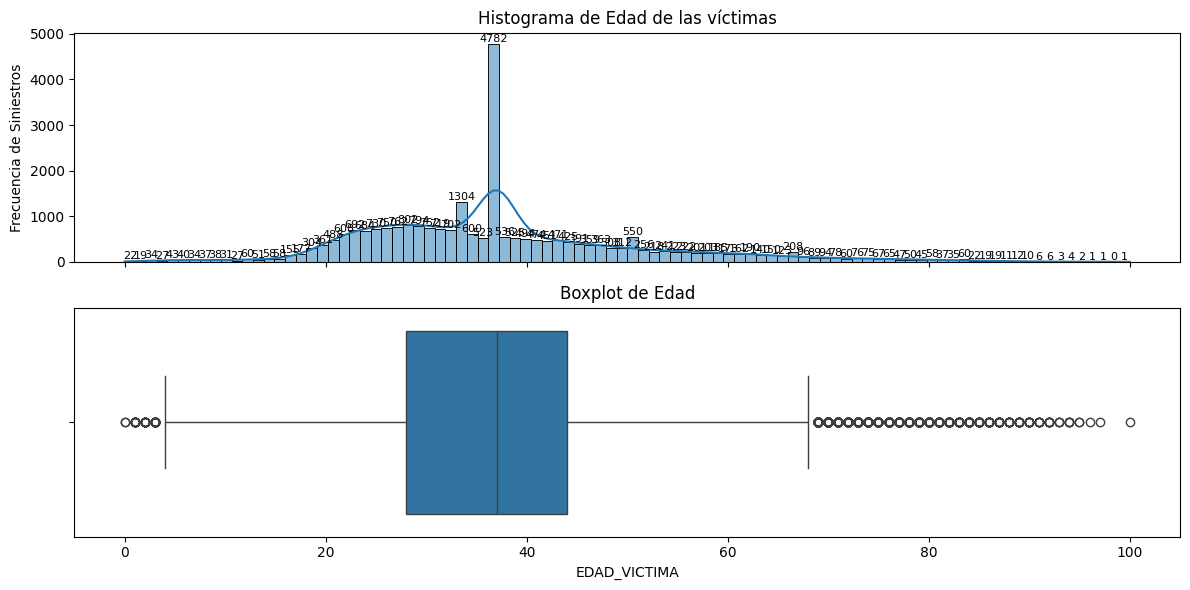

In [44]:
# Se crea una figura con un solo eje x compartido para tener dos gráficos en uno
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Se grafica el histograma de la edad
sns.histplot(lesiones['EDAD_VICTIMA'], kde=True, ax=ax[0]) #se agrega la línea de suavizado
ax[0].set_title('Histograma de Edad de las víctimas') ; ax[0].set_ylabel('Frecuencia de Siniestros')

# Agregar etiquetas de datos en el histograma
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')

# Se grafica el boxplot de la edad
sns.boxplot(x=lesiones['EDAD_VICTIMA'], ax=ax[1])
ax[1].set_title('Boxplot de Edad') ; ax[1].set_xlabel('EDAD_VICTIMA')

# Se ajusta y muestra el gráfico
plt.tight_layout()
plt.show()

Observamos que las edad entre 25 y 45 años tienen una mayor frecuencia de siniestros viales.

### Distribución de cantidad de víctimas por año y sexo.

Creao un DataFrame donde nos diga la cantidad de víctimas por año y según el sexo.

In [48]:
lesiones_pivot = lesiones.pivot_table(index='aaaa', columns='SEXO', aggfunc='size', fill_value=0)

In [50]:
lesiones_pivot

SEXO,MUJER,MUJER,SD,VARON
aaaa,,,,
2019,3697,0,392,7237
2020,1771,0,872,4130
2021,2698,1,853,5320


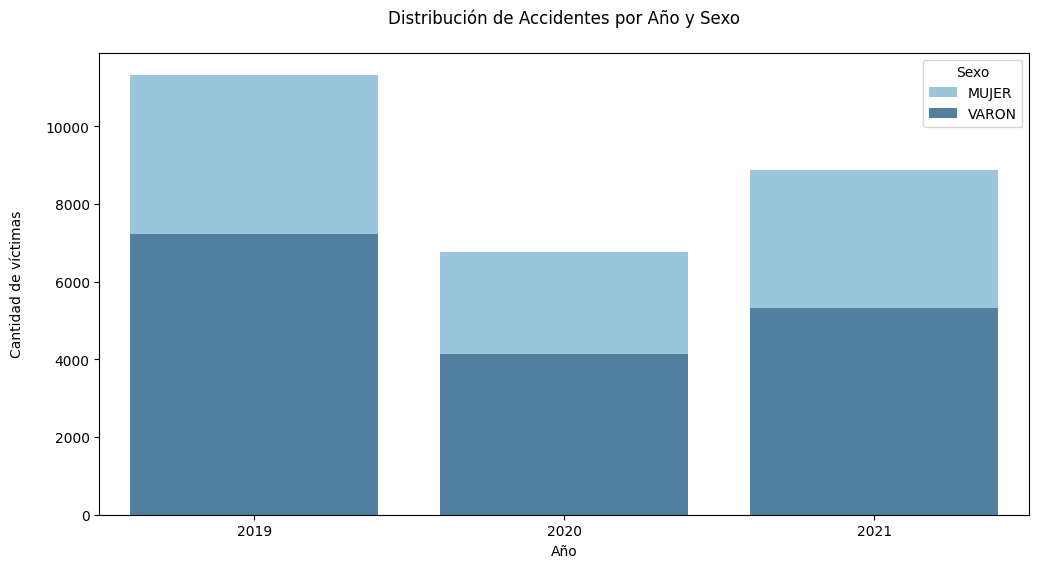

In [49]:
plt.figure(figsize=(12, 6))

sns.barplot(data=lesiones_pivot, x=lesiones_pivot.index, y=lesiones_pivot.sum(axis=1), color='#91C8E4', label='MUJER')
sns.barplot(data=lesiones_pivot, x=lesiones_pivot.index, y='VARON', color='#4682A9', label='VARON')

plt.xlabel('Año')
plt.ylabel('Cantidad de víctimas\n')
plt.title('Distribución de Accidentes por Año y Sexo\n')
plt.legend(title='Sexo', loc='upper right')
plt.xticks()

plt.show()

Se observa una mayor cantidad de victima de sexo Masculino en los siniestros de todos los años a comparacion de las victimas de sexo Femenino. Veamos esto mas en detalle

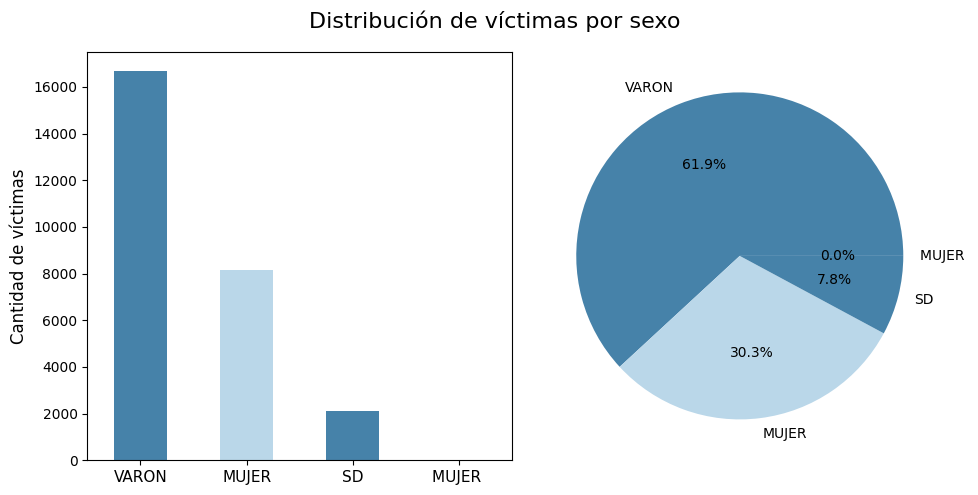

In [51]:
victimas_sexo = lesiones['SEXO'].value_counts()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  
victimas_sexo.plot(kind='bar', color=['#4682A9', '#BAD7E9'])
plt.xlabel('')
plt.ylabel('Cantidad de víctimas',fontsize= 12)
plt.xticks(rotation= 0,fontsize= 11) 

plt.subplot(1, 2, 2)  
victimas_sexo.plot(kind='pie', autopct='%1.1f%%', colors=['#4682A9', '#BAD7E9'])
plt.ylabel('')

plt.suptitle('Distribución de víctimas por sexo', fontsize=16)

plt.tight_layout() 
plt.show()

In [91]:
# Convertir el dataframe a un archivo CSV
lesiones.to_excel('lesiones_lipio.xlsx', index=False)

Le agremos los barios a las filas para luego filtrar por bario en el dashboard

In [96]:
df =pd.read_csv('hechos_limpios_preparado.csv')

In [97]:
df.head()

,N_VICTIMAS,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,1,2016-01-01,4:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,1,2016-01-02,1:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,1,2016-01-03,7:00:00,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,1,2016-01-10,0:00:00,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,1,2016-01-21,5:20:00,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS


In [98]:
import pandas as pd
from geopy.geocoders import Nominatim
from time import sleep

# Crear un objeto geolocalizador con un user_agent diferente
geolocator = Nominatim(user_agent="my_application_name")


# Función para obtener el barrio a partir de coordenadas
def obtener_barrio(lat, lon):
    try:
        ubicacion = geolocator.reverse((lat, lon), exactly_one=True)
        direccion = ubicacion.raw['address']
        barrio = direccion.get('suburb', 'No disponible')
        return barrio
    except Exception as e:
        print(f"Error: {e}")
        return 'Error'

# Crear una nueva columna en el DataFrame aplicando la función
df['barrio'] = df.apply(lambda row: obtener_barrio(row['pos y'], row['pos x']), axis=1)

# Mostrar el DataFrame actualizado
df.head()


,N_VICTIMAS,FECHA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,barrio
0,1,2016-01-01,4:00:00,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,Villa Riachuelo
1,1,2016-01-02,1:15:00,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,Mataderos
2,1,2016-01-03,7:00:00,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,Constitución
3,1,2016-01-10,0:00:00,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,Villa Lugano
4,1,2016-01-21,5:20:00,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,Constitución


In [100]:
# Convertir el dataframe a un archivo CSV
df.to_csv('hechos_limpios_preparado.csv', index=False)